In [2]:
### Using Python to conduct moving average anslysis to indentify trade entry signals and trade exit signals for Disney 

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [116]:
# read Disney's historical stock price price from yahoo finance

start = dt.datetime(2016,1,1)
end = dt.datetime(2017,10,24)

df = pdr.get_data_yahoo('DIS',start,end)
#df.to_csv('DIS.csv')

print(df.head())


                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2016-01-04  103.120003  103.430000  101.730003  102.980003  99.902618   
2016-01-05  102.669998  102.669998   99.889999  100.900002  97.884766   
2016-01-06   99.379997  101.459999   99.360001  100.360001  97.360901   
2016-01-07   98.959999  101.349998   98.519997   99.500000  96.526596   
2016-01-08  100.629997  100.919998   99.000000   99.250000  96.284065   

              Volume  
Date                  
2016-01-04  12531500  
2016-01-05  16212900  
2016-01-06  13934500  
2016-01-07  14680200  
2016-01-08  10691600  


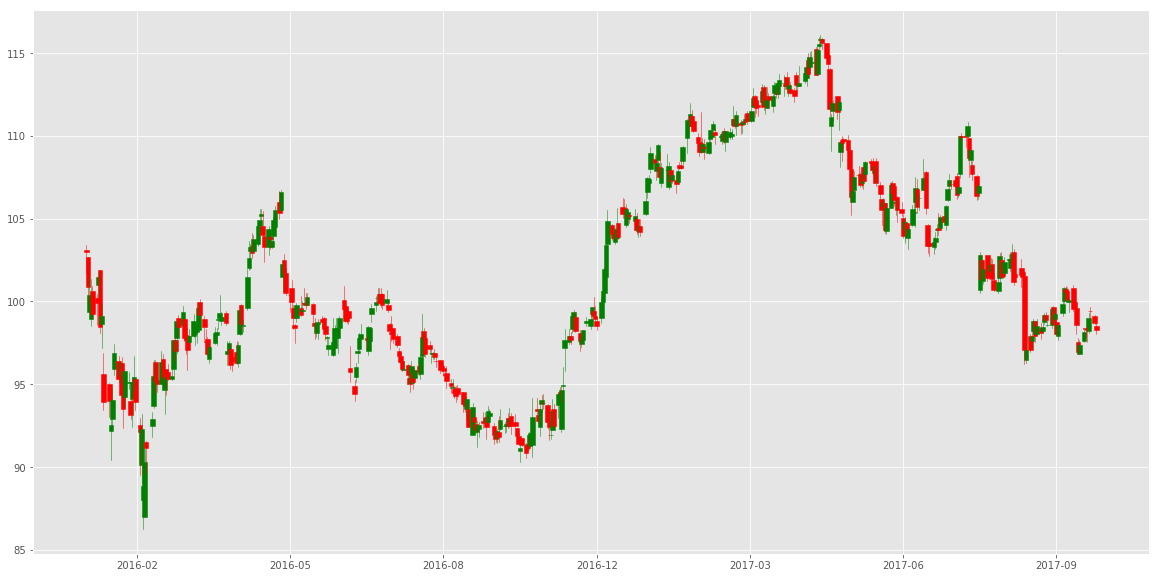

In [117]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import num2date
import matplotlib.dates as mdates


f1, ax = plt.subplots(figsize = (20,10))

# convert date format for ohlc to operate
df['Date'] = df.index.map(mdates.date2num)
ohlc = df[['Date','Open','High','Low','Close']]

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3,colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# other parameters
ax.grid(True)


# Change chart size
plt.show()

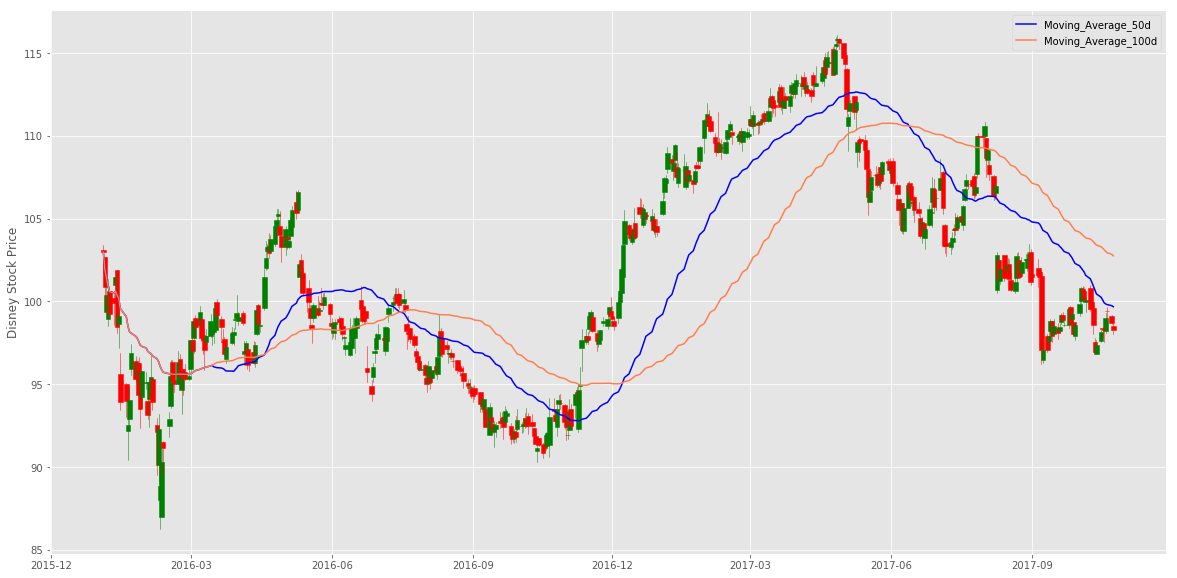

In [118]:
fig = plt.figure(figsize=(20, 10))


# Initialize the short and long windows
short_window = 50
long_window = 100

# Define chart size
ax = fig.add_subplot(111,ylabel = 'Disney Stock Price')


# convert date format for ohlc to operate
df['Date'] = df.index.map(mdates.date2num)
ohlc = df[['Date','Open','High','Low','Close']]

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# compute the simple moving average
df['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
df['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()


# plot the moving average lines
ax.plot(df.index, df['short_mavg'], color = 'blue', label = 'Moving_Average_50d')
ax.plot(df.index, df['long_mavg'], color = 'coral', label = 'Moving_Average_100d')


# Change chart size
plt.legend()
plt.show()

/Users/Fanny/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


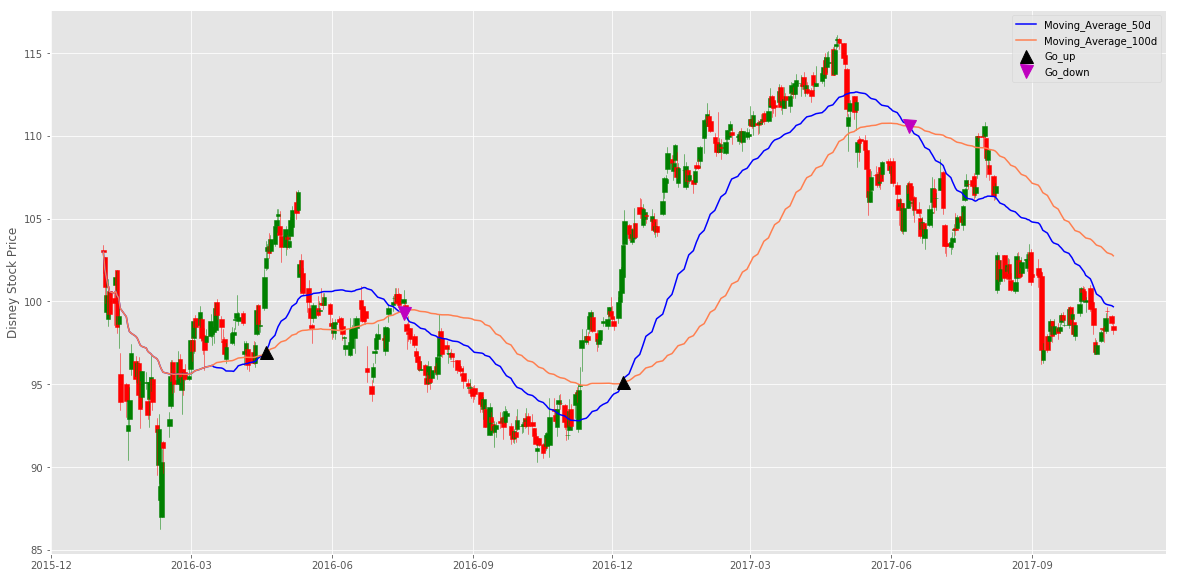

In [119]:
fig = plt.figure(figsize=(20, 10))


# Initialize the short and long windows
short_window = 50
long_window = 100

# Define chart size
ax = fig.add_subplot(111,ylabel = 'Disney Stock Price')


# convert date format for ohlc to operate
df['Date'] = df.index.map(mdates.date2num)
ohlc = df[['Date','Open','High','Low','Close']]

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# Initiate signal column = 0.0
df['signal'] = 0.0


# compute the simple moving average
df['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
df['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()


# plot the moving average lines
ax.plot(df.index, df['short_mavg'], color = 'blue', label = 'Moving_Average_50d')
ax.plot(df.index, df['long_mavg'], color = 'coral', label = 'Moving_Average_100d')



# Create signals
df['signal'][short_window:] = np.where(df['short_mavg'][short_window:] 
                                            > df['long_mavg'][short_window:], 1.0, 0.0) 


# Generate trading orders
df['positions'] = df['signal'].diff()


# Plot the buy signals
ax.plot(df.loc[df.positions == 1.0].index,df.short_mavg[df.positions == 1.0],'^', markersize=13, color='k',label ='Go_up')

# Plot the sell signals
ax.plot(df.loc[df.positions == -1.0].index,df.short_mavg[df.positions == -1.0],'v',markersize=13, color='m',label ='Go_down')


# Change chart size
plt.legend()
plt.show()